In [3]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('train.csv')
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [6]:
print ('Shape = >',train.shape)

Shape = > (38932, 5)


In [7]:
print ('Shape = >',test.shape)

Shape = > (29404, 4)


In [8]:
train.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [9]:
test.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
dtype: int64

In [10]:
train.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object

## EDA(Exploratory Data Analysis)

In [11]:
print ('not happy and happy counts','\n',train.Is_Response.value_counts())

not happy and happy counts 
 happy        26521
not happy    12411
Name: Is_Response, dtype: int64


In [12]:
#Ratio
print ('not happy ratio = ', round(len(train[train['Is_Response']=='not happy']) / len(train.Is_Response),2)*100,'%')
print ('happy ratio  = ', round(len(train[train['Is_Response']=='happy']) / len(train.Is_Response),2)*100,'%')

not happy ratio =  32.0 %
happy ratio  =  68.0 %


In [13]:
#New column for Length of message
train['length'] = train.Description.str.len()
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,length
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1613


### Data cleaning

In [14]:
#Label coding 0 and 1
train['Is_Response'].replace({'happy':0,'not happy':1},inplace=True)

In [15]:
# Convert all messages to lower case
train['Description'] = train['Description'].str.lower()

In [16]:
# Remove punctuation
train['Description'] = train['Description'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train['Description'] = train['Description'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train['Description'] = train['Description'].str.replace(r'^\s+|\s+?$', '')

In [17]:
train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,length
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,1,248
1,id10327,i stayed at the crown plaza april april the st...,Internet Explorer,Mobile,1,1077
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,1,1327
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,0,502
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,1,1613


In [18]:
train.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)

In [19]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['Description'] = train['Description'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [20]:
# New column (clean_length) after puncuations,stopwords removal
train['clean_length'] = train.Description.str.len()
train.head()

,Description,Is_Response,length,clean_length
0,room kind clean strong smell dogs generally av...,1,248,140
1,stayed crown plaza april april staff friendly ...,1,1077,649
2,booked hotel hotwire lowest price could find g...,1,1327,783
3,stayed husband sons way alaska cruise loved ho...,0,502,333
4,girlfriends stayed celebrate th birthdays plan...,1,1613,965


In [21]:
# Total length removal
print ('Original Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Original Length 33725876
Clean Length 20435179


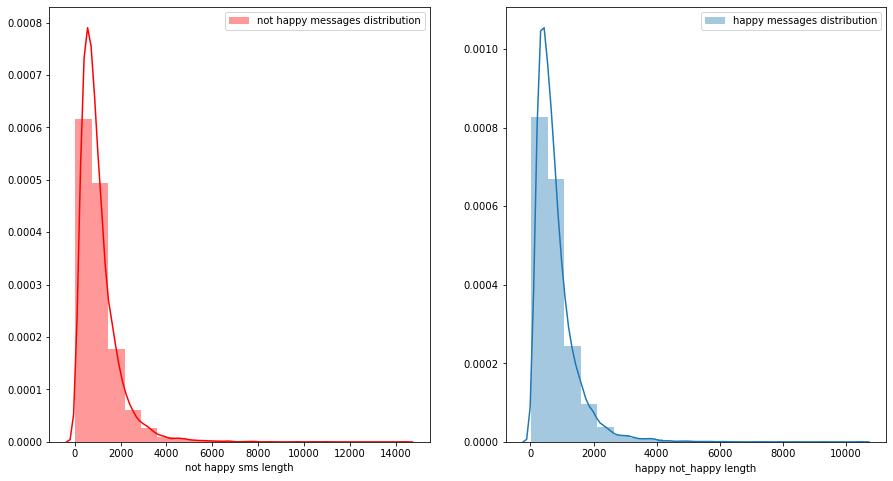

In [22]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['Is_Response']==1]['length'],bins=20,ax=ax[0],label='not happy messages distribution',color='r')

ax[0].set_xlabel('not happy sms length')
ax[0].legend()

sns.distplot(train[train['Is_Response']==0]['length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy not_happy length')
ax[1].legend()

plt.show()

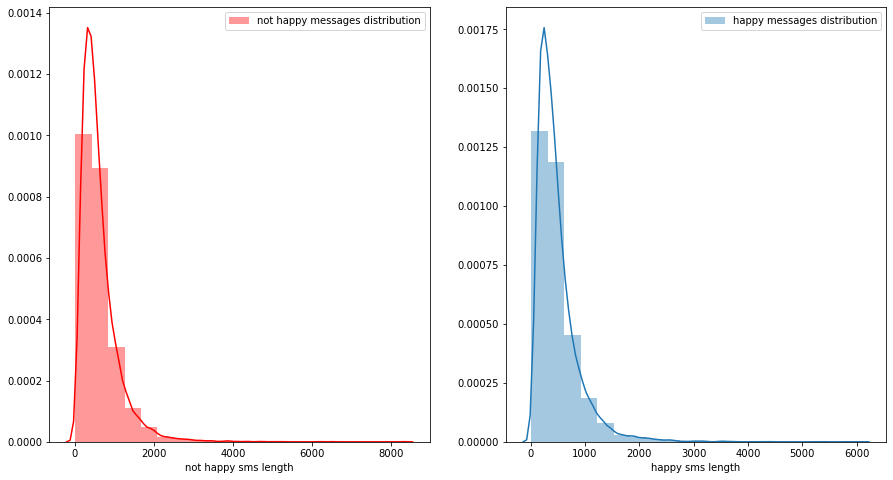

In [23]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['Is_Response']==1]['clean_length'],bins=20,ax=ax[0],label='not happy messages distribution',color='r')
ax[0].set_xlabel('not happy sms length')
ax[0].legend()

sns.distplot(train[train['Is_Response']==0]['clean_length'],bins=20,ax=ax[1],label='happy messages distribution')
ax[1].set_xlabel('happy sms length')
ax[1].legend()

plt.show()

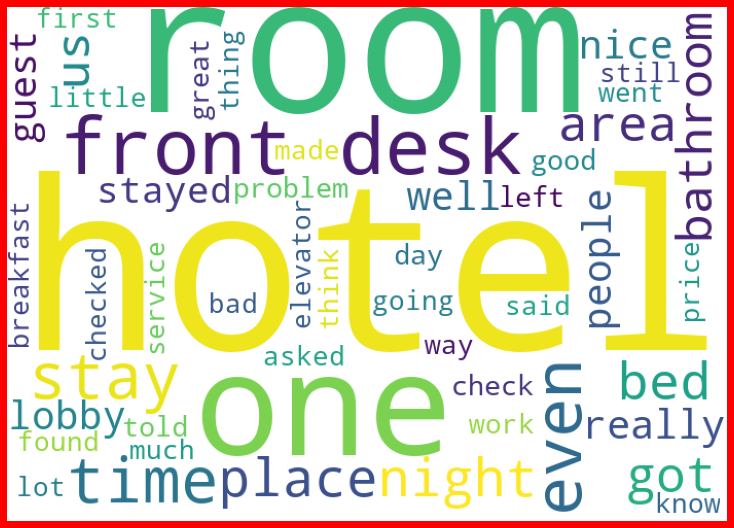

In [24]:
#Getting sense of loud words in not happy 
from wordcloud import WordCloud


not_happy = train['Description'][train['Is_Response']==1]

not_happy_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(not_happy))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(not_happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

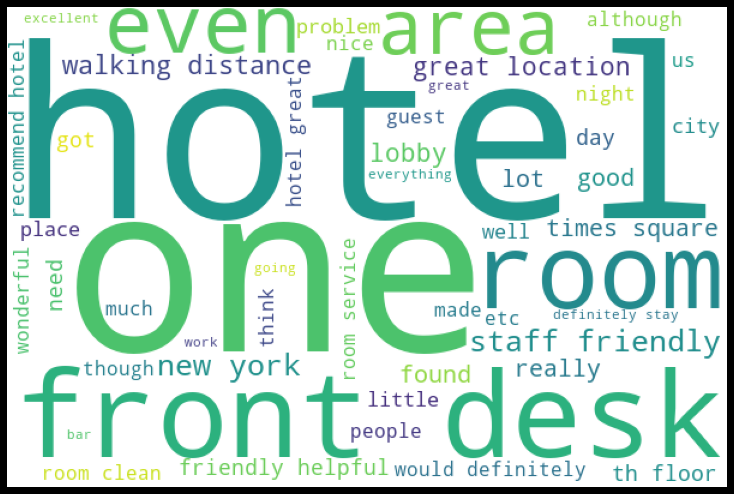

In [25]:
#Getting sense of loud words in happy 

happy = train['Description'][train['Is_Response']==0]
happy_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(happy))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(happy_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Different Model Building(train test split)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [26]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(train['Description'])
X = features
y = train['Is_Response']

In [61]:
X.shape

(38932, 45869)

In [37]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

## 1. Gaussian Navies bayes

In [39]:

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.8099396429947349
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5285
           1       0.95      0.43      0.59      2502

    accuracy                           0.81      7787
   macro avg       0.87      0.71      0.73      7787
weighted avg       0.84      0.81      0.78      7787



## 2. LogisticRegression

In [40]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(X_train,Y_train)
y_pred= ovr.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.8846795941954539
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5285
           1       0.87      0.76      0.81      2502

    accuracy                           0.88      7787
   macro avg       0.88      0.85      0.86      7787
weighted avg       0.88      0.88      0.88      7787



## 3. SVC(Support Vector Machine)

In [41]:
svm = LinearSVC()
svm.fit(X_train,Y_train)
y_pred= svm.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.8764607679465777
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5285
           1       0.83      0.78      0.80      2502

    accuracy                           0.88      7787
   macro avg       0.86      0.85      0.86      7787
weighted avg       0.88      0.88      0.88      7787



## 4. VotingClassifier

In [42]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(X_train,Y_train)
y_pred= clf.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.8803133427507384
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5285
           1       0.88      0.73      0.80      2502

    accuracy                           0.88      7787
   macro avg       0.88      0.84      0.86      7787
weighted avg       0.88      0.88      0.88      7787



In [47]:
classifier = LogisticRegression()
classifier.fit(X, classes)

In [72]:
def test_data_preprocess(test_data):
    test_data.drop(columns=['User_ID','Browser_Used','Device_Used'],axis=1,inplace=True)
    # Convert all messages to lower case
    test_data['Description'] = test_data['Description'].str.lower()
    # Remove punctuation
    test_data['Description'] = test_data['Description'].str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    test_data['Description'] = test_data['Description'].str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    test_data['Description'] = test_data['Description'].str.replace(r'^\s+|\s+?$', '')
    
    # Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    test_data['Description'] = test_data['Description'].apply(lambda x: ' '.join( term for term in x.split() if term not in stop_words))
    
    return test_data['Description']


### predict test data

In [73]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [74]:
clean_test = test_data_preprocess(test)

In [76]:
transform_test=tf_vec.transform(clean_test)

In [77]:
transform_test.shape

(29404, 45869)

In [79]:
y_load_predict=ovr.predict(transform_test)

In [84]:
test['Is_Response'] =  y_load_predict

In [86]:
#Label coding 0 and 1
test['Is_Response'].replace({0:'happy',1:'not happy'},inplace=True)

In [87]:
test.head()

,Description,Is_Response
0,looking motel close proximity tv taping dr phi...,not happy
1,walking distance madison square garden penn su...,happy
2,visited seattle business spent nights vintage ...,happy
3,hotel location excellent rooms clean suite one...,not happy
4,hotel awesome love service anthony really grea...,happy


### create csv file of customer's response prediction.

In [88]:
test.to_csv('cutomer_response.csv',index=False)